In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/iphone_models_data.csv')

# Display the first 5 rows of the dataframe
data.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,ios_version
0,iPhone 11,4.2,49999,https://example.com/iphone11.jpeg,12,Super Retina,3110,64,4,A13 Bionic,iOS 13
1,iPhone 11 Pro,4.5,69999,https://example.com/iphone11pro.jpeg,12,Super Retina XDR,3046,64,4,A13 Bionic,iOS 13
2,iPhone 11 Pro Max,4.6,79999,https://example.com/iphone11promax.jpeg,12,Super Retina XDR,3969,64,4,A13 Bionic,iOS 13
3,iPhone 12,4.4,64999,https://example.com/iphone12.jpeg,12,Super Retina XDR,2815,64,4,A14 Bionic,iOS 14
4,iPhone 12 Mini,4.3,59999,https://example.com/iphone12mini.jpeg,12,Super Retina XDR,2227,64,4,A14 Bionic,iOS 14


In [2]:
# Data cleaning for the new dataset

# Remove the currency symbol from the price and convert it to an integer
data['ratings'] = pd.to_numeric(data['ratings'].replace('not mentioned', pd.NA))
data['price'] = data['price'].astype(int)

# Split the 'camera' field into 'primary_camera', 'secondary_camera', and 'flash_type'
data['camera'] = data['camera'].astype(float)

# Fill missing values in 'battery_capacity' with -1 before converting to integer
data['battery'] = data['battery'].astype(int)

data['storage'] = data['storage'].astype(float)
data['ram'] = data['ram'].astype(float)
data.head()

# Drop the original columns
#data.drop(['imgURL', 'os_processor', 'camera', 'display', 'network', 'battery'], axis=1, inplace=True)

data.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,ios_version
0,iPhone 11,4.2,49999,https://example.com/iphone11.jpeg,12.0,Super Retina,3110,64.0,4.0,A13 Bionic,iOS 13
1,iPhone 11 Pro,4.5,69999,https://example.com/iphone11pro.jpeg,12.0,Super Retina XDR,3046,64.0,4.0,A13 Bionic,iOS 13
2,iPhone 11 Pro Max,4.6,79999,https://example.com/iphone11promax.jpeg,12.0,Super Retina XDR,3969,64.0,4.0,A13 Bionic,iOS 13
3,iPhone 12,4.4,64999,https://example.com/iphone12.jpeg,12.0,Super Retina XDR,2815,64.0,4.0,A14 Bionic,iOS 14
4,iPhone 12 Mini,4.3,59999,https://example.com/iphone12mini.jpeg,12.0,Super Retina XDR,2227,64.0,4.0,A14 Bionic,iOS 14


In [3]:
## Average rating and price for each smartphone model
average_rating_price = data.groupby('name')[['ratings', 'price']].mean() # Group by 'name' column, then calculate mean

average_rating_price.head()

,ratings,price
name,,
iPhone 11,4.2,49999.0
iPhone 11 Pro,4.5,69999.0
iPhone 11 Pro Max,4.6,79999.0
iPhone 12,4.4,64999.0
iPhone 12 Mini,4.3,59999.0


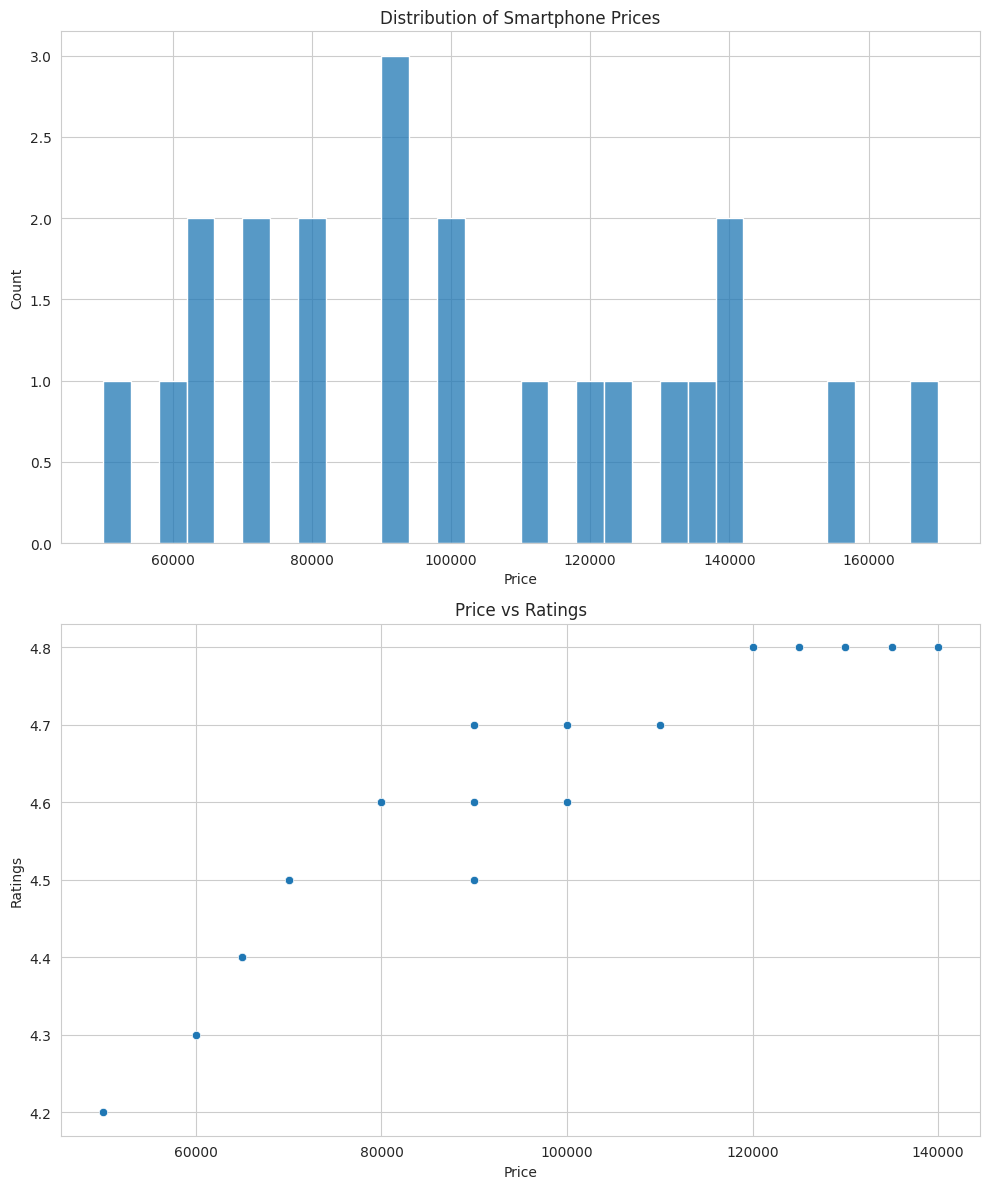

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Histogram of prices
sns.histplot(data['price'], bins=30, ax=ax1)
ax1.set_title('Distribution of Smartphone Prices')
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')

# Scatter plot of prices and ratings
sns.scatterplot(data, x='price', y='ratings', ax=ax2)
ax2.set_title('Price vs Ratings')
ax2.set_xlabel('Price')
ax2.set_ylabel('Ratings')

# Display the plots
plt.tight_layout()
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Select numeric features
features = ['ratings', 'price', 'ram', 'camera', 'storage', 'battery']
data_subset = data[features]

# Handle missing values by filling them with the mean value of each column
data_subset = data_subset.fillna(data_subset.mean())

# Standardize the features
scaler = StandardScaler()
data_subset_scaled = scaler.fit_transform(data_subset)

# Compute the cosine similarity for the first 5 products
similarity_matrix = cosine_similarity(data_subset_scaled[:5])

similarity_matrix

array([[1.        , 0.84958994, 0.51226249, 0.92955077, 0.90049874],
       [0.84958994, 1.        , 0.71257907, 0.96895333, 0.88826736],
       [0.51226249, 0.71257907, 1.        , 0.55937386, 0.33745043],
       [0.92955077, 0.96895333, 0.55937386, 1.        , 0.96886383],
       [0.90049874, 0.88826736, 0.33745043, 0.96886383, 1.        ]])

In [6]:
import ipywidgets as widgets
from IPython.display import display, Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd # Import pandas for DataFrame operations

# Function to recommend products
def recommend_products(product_name, data, features, num_recommendations=5):
    # Select numeric features before filling missing values
    numeric_data = data[features]

    # Fill missing values with the mean value of each *numeric* column
    numeric_data = numeric_data.fillna(numeric_data.mean())

    # Update the original DataFrame with the filled numeric values
    data[features] = numeric_data

    # Standardize the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])

    # Create a DataFrame from the scaled data
    data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=features)

    # Compute the cosine similarity matrix
    similarity_matrix = cosine_similarity(data_scaled)

    # Create a Series from the similarity matrix using the product names as the index
    product_similarities = pd.Series(similarity_matrix[data.index[data['name'] == product_name][0]], index=data['name'])

    # Get the top products with the highest cosine similarity
    top_products = product_similarities.sort_values(ascending=False).head(num_recommendations + 1)

    # Remove the input product itself from the recommendations
    top_products = top_products.iloc[1:]

    return top_products

# Dropdown widget for product selection
product_dropdown = widgets.Dropdown(
    options=data['name'].unique(),
    description='Product:',
    disabled=False,
)

# Button to trigger the recommendation
recommend_button = widgets.Button(description='Recommend')

# Output widget to display the recommendations
output = widgets.Output()

display(product_dropdown, recommend_button, output)

def recommend(button):
    # Clear previous output
    output.clear_output()

    # Get selected product
    product_name = product_dropdown.value

    # Get recommendations
    features = ['ratings', 'price', 'ram', 'camera', 'storage', 'battery']
    recommendations = recommend_products(product_name, data, features)

    # Display recommendations
    with output:
        for product in recommendations.index:
            print(f"Product: {product}, Similarity Score: {recommendations[product]}")

recommend_button.on_click(recommend)

Dropdown(description='Product:', options=('iPhone 11', 'iPhone 11 Pro', 'iPhone 11 Pro Max', 'iPhone 12', 'iPh…

Button(description='Recommend', style=ButtonStyle())

Output()

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features to use for segmentation
features = ['ratings', 'price', 'ram', 'camera', 'storage', 'battery']
# Fill missing values with the median of each column
data[features] = data[features].fillna(data[features].median())

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

# Add the cluster labels to the original DataFrame
data['cluster'] = kmeans.labels_

# Print the number of phones in each cluster
print(data['cluster'].value_counts())

cluster
0    9
1    7
2    6
Name: count, dtype: int64


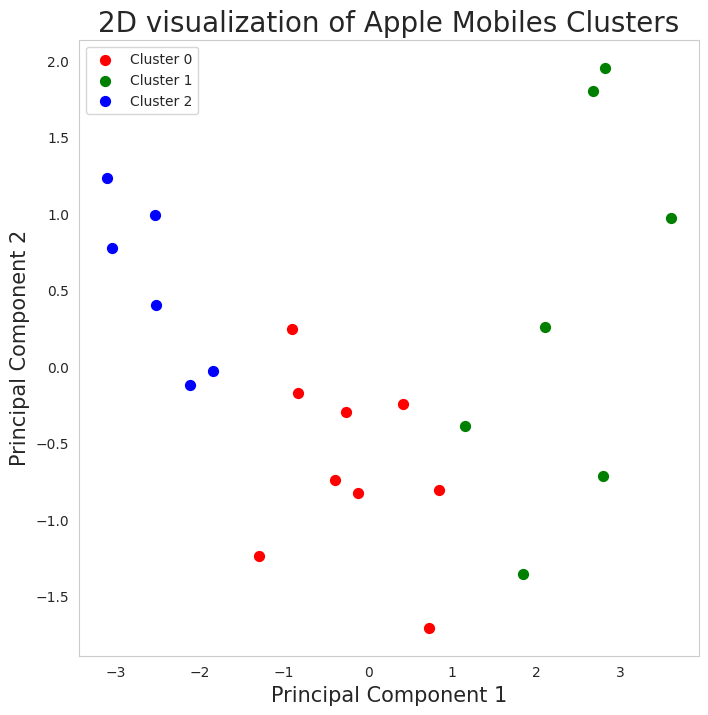

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the two principal components
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Concatenate the clusters labels to the DataFrame
final_df = pd.concat([principal_df, data[['cluster']]], axis=1)

# Plot the clusters
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D visualization of Apple Mobiles Clusters', fontsize=20)

colors = ['r', 'g', 'b']
for cluster in range(3):
    indicesToKeep = final_df['cluster'] == cluster
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'], final_df.loc[indicesToKeep, 'principal component 2'], c=colors[cluster], s=50)

ax.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
ax.grid()

In [9]:
cluster_characteristics = data.groupby('cluster')[features].mean()
print(cluster_characteristics)

          ratings          price       ram  camera     storage      battery
cluster                                                                    
0        4.644444   95554.555556  5.777778    20.0  120.888889  3694.888889
1        4.714286  142141.857143  7.428571    48.0  329.142857  3797.857143
2        4.383333   63332.333333  4.000000    12.0   85.333333  2812.666667


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Select relevant columns for model training
selected_columns = ['ratings', 'price', 'ram', 'camera', 'storage', 'battery', 'cluster']
data_selected = data[selected_columns]

# Drop rows with missing target values (price) if any
data_selected = data_selected.dropna(subset=['price'])

# Separate features (X) and target (y)
X = data_selected.drop(columns=['price'])
y = data_selected['price']

# Handle missing values by filling them with the mean of each column
X_filled = X.fillna(X.mean())

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X_filled)

# Now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Initialize all the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(n_estimators=100, random_state=0),
    SVR(),
    GradientBoostingRegressor(random_state=0)
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate the mean absolute error of the predictions
    mae = mean_absolute_error(y_test, predictions)

    print(f"{model_name} MAE: ", mae)

LinearRegression MAE:  15818.103019549924
DecisionTreeRegressor MAE:  22000.0
RandomForestRegressor MAE:  22790.0
SVR MAE:  40999.680190279716
GradientBoostingRegressor MAE:  25335.31456160417


In [11]:
important_features_data = data[['ratings', 'price', 'ram', 'camera', 'storage', 'battery', 'cluster']]

# Step 2: Prepare the data for modeling
X = important_features_data[['ratings', 'ram', 'camera', 'storage', 'battery']]
y = important_features_data['price']

# Step 3: Train the GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Assuming you have already split the data into training and testing sets, and X_train, y_train are the training data.
# You can also use the entire dataset for training if you prefer.
model = GradientBoostingRegressor()
model.fit(X, y)

# Step 4: Get the feature importances
feature_importances = model.feature_importances_

# Step 5: Sort and display the important features
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

   Feature  Importance
2   camera    0.535039
0  ratings    0.155084
1      ram    0.153799
3  storage    0.102989
4  battery    0.053089


In [12]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Function to make a price prediction based on user input
def predict_price(ratings, ram, camera, storage, battery, cluster):
    # Create a DataFrame with the user input
    input_data = pd.DataFrame({
        'ratings': [ratings],
        'ram': [ram],
        'camera': [camera],
        'storage': [storage],
        'battery': [battery],
        'cluster': [cluster]
    })

    # Handle missing values in the input
    input_data_filled = input_data.fillna(input_data.mean())

    # Make the price prediction using the trained GradientBoostingRegressor
    price_prediction = models[-1].predict(input_data_filled)[0]

    return price_prediction

# Create input widgets for user input
ratings_input = widgets.FloatSlider(description='Ratings:', min=1.0, max=5.0, step=0.1, value=3.0)
ram_input = widgets.FloatSlider(description='RAM (GB):', min=0.0, max=16.0, step=0.5, value=4.0)
cam_input = widgets.FloatSlider(description='Camera (MP):', min=0.0, max=108.0, step=0.5, value=4.0)
storage_input = widgets.FloatSlider(description='Storage (GB):', min=0.0, max=128.0, step=0.5, value=4.0)
battery_capacity_input = widgets.FloatSlider(description='Battery Capacity (mAh):', min=0.0, max=10000.0, step=10.0, value=5000.0)
cluster_options = [0, 1, 2]
cluster_input = widgets.Dropdown(description='Cluster:', options=cluster_options, value=0)

# Create a button for prediction
predict_button = widgets.Button(description='Predict Price')

# Output widget to display the prediction result
output = widgets.Output()

# Function to handle the button click and display the prediction
def on_predict_button_click(button):
    # Clear previous output
    output.clear_output()

    # Get user input
    ratings = ratings_input.value
    camera = cam_input.value
    storage = storage_input.value
    ram = ram_input.value
    battery = battery_capacity_input.value
    cluster = cluster_input.value

    # Make the price prediction
    price_prediction = predict_price(ratings, ram, camera, storage, battery, cluster)*185

    # Display the prediction
    with output:
        print(f"Predicted Price: Rp{price_prediction:.2f}")

# Attach the click event to the button
predict_button.on_click(on_predict_button_click)

# Display the widgets
display(ratings_input, cam_input, storage_input, ram_input, battery_capacity_input, cluster_input, predict_button, output)


FloatSlider(value=3.0, description='Ratings:', max=5.0, min=1.0)

FloatSlider(value=4.0, description='Camera (MP):', max=108.0, step=0.5)

FloatSlider(value=4.0, description='Storage (GB):', max=128.0, step=0.5)

FloatSlider(value=4.0, description='RAM (GB):', max=16.0, step=0.5)

FloatSlider(value=5000.0, description='Battery Capacity (mAh):', max=10000.0, step=10.0)

Dropdown(description='Cluster:', options=(0, 1, 2), value=0)

Button(description='Predict Price', style=ButtonStyle())

Output()